## 이중차분법을 통해 기상데이터와 코로나 데이터가 수요량과 어떠한 관계가 있는지를 파악하고자 한다.

In [4]:
# load package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import plotly_express as px

In [7]:
# directory check
import os
os.getcwd()


'/Users/kyeongtae/Library/CloudStorage/Dropbox/GitHub/coding/자료분석 및 실험/code/model'

In [10]:
# 기상 data load
weather_1 = pd.read_csv('../../data/weather/peak_2018.csv')
weather_2 = pd.read_csv('../../data/weather/peak_2019.csv')
weather_3 = pd.read_csv('../../data/weather/peak_2020.csv')

test_weather = pd.read_csv('../../data/weather/peak_2021.csv')

# 따릉이 수요량 data load
demand = pd.read_csv('../../data/traindata.csv')
demand

,date,광진구,동대문구,성동구,중랑구
0,2018-01-01,0.592,0.368,0.580,0.162
1,2018-01-02,0.840,0.614,1.034,0.260
2,2018-01-03,0.828,0.576,0.952,0.288
3,2018-01-04,0.792,0.542,0.914,0.292
4,2018-01-05,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1091,2020-12-27,3.528,2.604,3.258,2.038
1092,2020-12-28,4.542,3.588,4.506,2.480
1093,2020-12-29,3.694,3.054,3.222,2.118
1094,2020-12-30,2.366,1.812,2.012,1.174


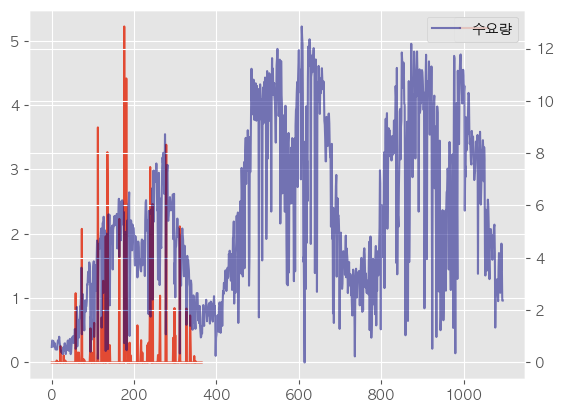

In [22]:
plt.rc('font', family = 'AppleGothic')
weather_1['rain'].plot(label = '강수량')
plt.legend('강수량')
plt.gca().twinx()
demand['광진구'].plot(colormap='jet', alpha=0.5, label = '수요량')
plt.legend()
plt.show()

In [23]:
# 2020년 데이터로 우선적으로 진행
df = pd.read_csv('../../data/df_with_infected.csv')
df

,Unnamed: 0,date,광진구,동대문구,성동구,중랑구,temp,rain,humid,snow,sum
0,0,2020-01-20,3.156,2.142,2.852,1.394,2.438462,0.000000,45.461538,0.0,0
1,1,2020-01-21,3.420,2.288,2.996,1.620,0.330769,0.000000,33.769231,0.0,0
2,2,2020-01-22,3.780,2.424,3.074,1.626,3.838462,0.000000,31.230769,0.0,0
3,3,2020-01-23,3.998,2.424,3.172,1.800,5.538462,0.000000,43.307692,0.0,0
4,4,2020-01-24,2.388,1.392,1.864,1.288,3.653846,0.000000,59.846154,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
342,342,2020-12-27,3.528,2.604,3.258,2.038,6.484615,0.000000,61.384615,0.0,348
343,343,2020-12-28,4.542,3.588,4.506,2.480,7.846154,0.000000,70.538462,0.0,290
344,344,2020-12-29,3.694,3.054,3.222,2.118,1.807692,0.015385,76.615385,0.0,447
345,345,2020-12-30,2.366,1.812,2.012,1.174,-10.538462,0.000000,52.461538,0.0,367


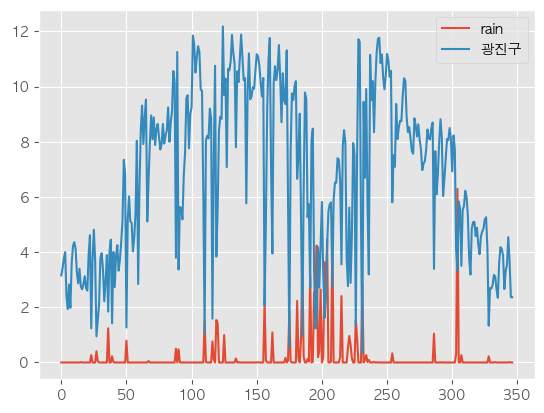

[[ 1.         -0.35388834]
 [-0.35388834  1.        ]]


In [25]:
df[['rain', '광진구']].plot()
plt.show()

print(np.corrcoef(df['rain'], df['광진구']))